In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The python code in this notebook is hidden for easier reading.
To show/hie code, click <a href="javascript:code_toggle()">here.</a>.''')

In [2]:
%config InlineBackend.figure_format = 'svg'



<br><br><br>



<h1><font color="#004D7F" size=6>Statistical analysis of Devops survey Industry vs Academy.</font></h1>

[1. Prevalence of each technological practice in both Industry and Academia.](#section1)

[2. Prevalence different between both contexts.](#section2)

[3. Relation of the perceived level of DevOps with the prevalence of each practice.](#section3)

[4. Correlation between practices in the same context](#section4)


In [3]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
from IPython.display import display, HTML
from statsmodels.stats.proportion import proportions_ztest,proportions_chisquare
import scipy.stats as stats
import seaborn as sns
import warnings


df = pd.read_csv('dataframe.csv',sep='\t')

In [4]:
df.columns=['Location','Context','Level','Small_Batches','Limit_WIP','Visual','visual_ex','Feedback','feedback_ex','Light_Change','Change_ex','CI','CD','TA','ta_ex','TA_Stage','ta_stage_ex','VC','vc_ex','Trunk','vc_ex',
             'Sec_left','Loose','loose_ex','Microservices','Teams','Agile','agile_ex','Experience','Degree','Value']
df.loc[df['Context']==0, 'Context']='Academia'
df.loc[df['Context']==1, 'Context']='Industry'

v_practices=['Small_Batches','Limit_WIP','Visual','Feedback','Light_Change','CI','CD','TA','TA_Stage','VC','Trunk',
             'Sec_left','Loose','Microservices','Agile']
df_ind=df[df['Context']=='Industry']
df_aca=df[df['Context']=='Academia']

In [5]:
for c in df.columns:
    print(c)
    

Location
Context
Level
Small_Batches
Limit_WIP
Visual
visual_ex
Feedback
feedback_ex
Light_Change
Change_ex
CI
CD
TA
ta_ex
TA_Stage
ta_stage_ex
VC
vc_ex
Trunk
vc_ex
Sec_left
Loose
loose_ex
Microservices
Teams
Agile
agile_ex
Experience
Degree
Value


<a id='section1'></a>
## 1. Prevalence of each technological practice in both Industry and Academia.

In [6]:

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The python code in this notebook is hidden for easier reading.
To show/hie code, click <a href="javascript:code_toggle()">here.</a>.''')

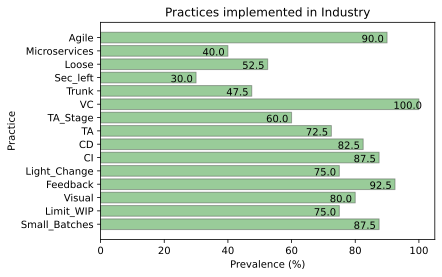

In [7]:
freq_abs_ind = []
for p in v_practices:
    freq_abs_ind.append(df_ind[p].value_counts()[1]) # 1 stands for Yes
    
freq_perc_ind=[v*(100/len(df_ind.index)) for v in freq_abs_ind]
plt.xlabel("Prevalence (%)")
plt.ylabel("Practice")
plt.title("Practices implemented in Industry")
bars=plt.barh(y=v_practices,width=freq_perc_ind,
            alpha=0.4, color='g',
            edgecolor="0.2") 

for i in range(len(bars)):
    value=bars[i].get_width()
    plt.text(bars[i].get_width()-8,i-0.5,'%.1f' % float(value),va='bottom',color='black')

plt.show()




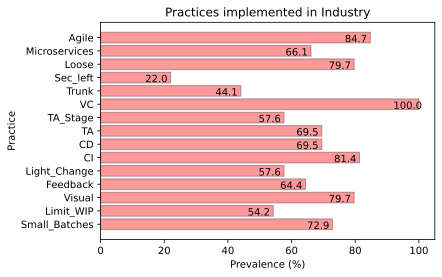

In [8]:
freq_abs_aca = []
for p in v_practices:
    freq_abs_aca.append(df_aca[p].value_counts()[1]) # 1 is Yes
    
freq_perc_aca=[v*(100/len(df_aca.index)) for v in freq_abs_aca]
plt.xlabel("Prevalence (%)")
plt.ylabel("Practice")
plt.title("Practices implemented in Industry")
bars=plt.barh(y=v_practices,width=freq_perc_aca,
            alpha=0.4, color='r',
            edgecolor="0.2" ) # hatch="/"

for i in range(len(bars)):
    value=bars[i].get_width()
    plt.text(bars[i].get_width()-8,i-0.5,'%.1f' % float(value),va='bottom',color='black')

plt.show()


<a id='section2'></a>
## 2. Prevalence different between both contexts


In [9]:

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The python code in this notebook is hidden for easier reading.
To show/hie code, click <a href="javascript:code_toggle()">here.</a>.''')

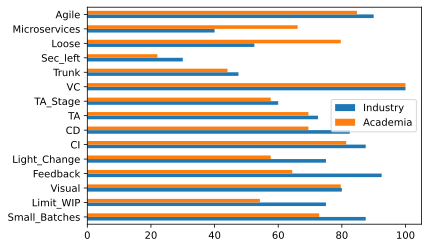

In [10]:
df_percents = pd.DataFrame({'Industry': freq_perc_ind,
                   'Academia': freq_perc_aca},index=v_practices)


ax =  df_percents.plot.barh()




In [11]:
# http://ethen8181.github.io/machine-learning/ab_tests/frequentist_ab_test.html#Comparing-Two-Proportions
def two_proprotions_confint(success_a, size_a, success_b, size_b, significance = 0.05):
    """
    A/B test for two proportions;
    given a success a trial size of group A and B compute
    its confidence interval;
    resulting confidence interval matches R's prop.test function
    
    Parameters
    ----------
    success_a, success_b : int
        Number of successes in each group
        
    size_a, size_b : int
        Size, or number of observations in each group
        
    significance : float, default 0.05
        Often denoted as alpha. Governs the chance of a false positive.
        A significance level of 0.05 means that there is a 5% chance of
        a false positive. In other words, our confidence level is
        1 - 0.05 = 0.95
        
    Returns
    -------
    prop_diff : float
        Difference between the two proportion
    
    confint : 1d ndarray
        Confidence interval of the two proportion test
    """
    prop_a = success_a / size_a
    prop_b = success_b / size_b
    var = prop_a * (1 - prop_a) / size_a + prop_b * (1 - prop_b) / size_b
    se = np.sqrt(var)
    
    # z critical value
    confidence = 1 - significance
    z = stats.norm(loc = 0, scale = 1).ppf(confidence + significance / 2)

    # standard formula for the confidence interval
    # point-estimtate +- z * standard-error
    prop_diff = prop_b - prop_a
    confint = prop_diff + np.array([-1, 1]) * z * se
    return prop_diff, confint


In [12]:
warnings.filterwarnings('ignore') #ignore warnings because VC is 100%

df_prop = pd.DataFrame(columns=["Practice",'p-value','Indust - Acad','CI (95%)'])

n_observations_ind= len(df_ind.index)
n_observations_aca= len(df_aca.index)

for i in range(len(v_practices)):
    count = np.array([freq_abs_ind[i], freq_abs_aca[i]])
    nobs = np.array([n_observations_ind, n_observations_aca])
    _, pval = proportions_ztest(count, nobs)
    mark="*" if pval<0.05 else ""
    diff, ci =two_proprotions_confint(freq_abs_ind[i],n_observations_ind,freq_abs_aca[i],n_observations_aca)
    s = pd.Series({"Practice": v_practices[i],
                "p-value": '{0:0.3f}'.format(pval)+mark,
                "Indust - Acad": '%.3f'%(-1*diff*100),
                "CI (95%)": '[%.3f'%(-1*ci[0]*100)+' , %.3f'%(-1*ci[1]*100)+']'})
    df_prop=df_prop.append(s,ignore_index=True)
display(df_prop.sort_values("p-value"))

warnings.filterwarnings('once') 

,Practice,p-value,Indust - Acad,CI (95%)
3,Feedback,0.001*,28.093,"[42.786 , 13.400]"
12,Loose,0.004*,-27.161,"[-8.587 , -45.735]"
13,Microservices,0.010*,-26.102,"[-6.701 , -45.502]"
1,Limit_WIP,0.036*,20.763,"[39.247 , 2.278]"
4,Light_Change,0.076,17.373,"[35.786 , -1.041]"
0,Small_Batches,0.081,14.619,"[29.907 , -0.669]"
6,CD,0.144,13.008,"[29.642 , -3.626]"
11,Sec_left,0.371,7.966,"[25.673 , -9.741]"
5,CI,0.415,6.144,"[20.420 , -8.132]"
14,Agile,0.448,5.254,"[18.316 , -7.807]"


### DeveOps level perception

In [13]:
df['Degree_levels'] = df['Degree'].map({1: 'Low', 2: 'Low', 3: 'Medium', 4: 'High', 5: 'High'})
print("Answers per level:\n",df['Degree_levels'].value_counts())
print('\nContingency table for #answers by Context and Level:') 
df_obs=pd.crosstab(df['Context'], df['Degree_levels'])
display(df_obs)

df_ind=df[df['Context']=='Industry']
df_aca=df[df['Context']=='Academia']
levels = ['Low','Medium','High']
df_ind_obs = pd.DataFrame(index=v_practices,columns=levels)
df_aca_obs = pd.DataFrame(index=v_practices,columns=levels)
df_ind_freq=pd.DataFrame(index=v_practices,columns=levels)
df_aca_freq=pd.DataFrame(index=v_practices,columns=levels)
df_ind_freq.index.name='Practice'
df_aca_freq.index.name='Practice'

for p in v_practices:
    for l in levels:
        counts_ind = df_ind[df_ind['Degree_levels']==l][p].value_counts()
        counts_aca = df_aca[df_aca['Degree_levels']==l][p].value_counts()
        # array value_counts.values has in forst slot [0] the positive answers (1)
        df_ind_obs.at[p,l]=counts_ind.values[0]
        df_ind_freq.at[p,l]=counts_ind.values[0]*(100/counts_ind.values.sum())
                
        df_aca_obs.at[p,l]=counts_aca.values[0]
        df_aca_freq.at[p,l]=counts_aca.values[0]*(100/counts_aca.values.sum())

Answers per level:
 Medium    37
Low       33
High      29
Name: Degree_levels, dtype: int64

Contingency table for #answers by Context and Level:


Degree_levels,High,Low,Medium
Context,,,
Academia,13,20,26
Industry,16,13,11


In [14]:
print("Positive answers frecuency for each practice given Context (first Industry then Academia) and Level:")
display(df_ind_freq.astype(float).round(1))
display(df_aca_freq.astype(float).round(1))

Positive answers frecuency for each practice given Context (first Industry then Academia) and Level:


,Low,Medium,High
Practice,,,
Small_Batches,76.9,90.9,93.8
Limit_WIP,69.2,63.6,87.5
Visual,84.6,72.7,81.2
Feedback,84.6,90.9,100.0
Light_Change,61.5,72.7,87.5
CI,69.2,90.9,100.0
CD,61.5,81.8,100.0
TA,53.8,90.9,81.2
TA_Stage,61.5,63.6,75.0


,Low,Medium,High
Practice,,,
Small_Batches,60.0,88.5,92.3
Limit_WIP,55.0,50.0,76.9
Visual,55.0,88.5,100.0
Feedback,60.0,69.2,61.5
Light_Change,75.0,69.2,84.6
CI,60.0,88.5,100.0
CD,50.0,76.9,84.6
TA,55.0,80.8,84.6
TA_Stage,70.0,65.4,84.6


 
Group comparison of proportions.
Z-test between duples <practice, devops perceived level> and its counterpart in the other context

In [15]:
warnings.filterwarnings('ignore') #VC is 100%
for l in levels:
    df_prop= pd.DataFrame(columns=["Practice",'p-value','Indust - Acad','CI (95%)'])
    for p in v_practices:
        count = np.array([df_ind_obs.at[p,l], df_aca_obs.at[p,l]])
        nobs_ind=df_ind[df_ind['Degree_levels']==l][p].value_counts().values.sum()
        nobs_aca=df_aca[df_aca['Degree_levels']==l][p].value_counts().values.sum()
        nobs = np.array([nobs_ind,nobs_aca])
        _, pval = proportions_ztest(count, nobs)
        mark="*" if pval<0.05 else ""
        diff, ci =two_proprotions_confint(df_ind_obs.at[p,l],nobs_ind,
                                           df_aca_obs.at[p,l],nobs_aca)
        s = pd.Series({"Practice": p,
                    "p-value": '{0:0.3f}'.format(pval)+mark,
                    "Indust - Acad": '%.3f'%(-1*diff*100),
                    "CI (95%)": '[%.3f'%(-1*ci[0]*100)+' , %.3f'%(-1*ci[1]*100)+']'})
        df_prop=df_prop.append(s,ignore_index=True)
    df_prop.index.name=l
    display(df_prop.sort_values('p-value'))
    
warnings.filterwarnings('once') 

,Practice,p-value,Indust - Acad,CI (95%)
Low,,,,
2,Visual,0.078,29.615,"[58.942 , 0.289]"
14,Agile,0.126,22.308,"[47.070 , -2.455]"
11,Sec_left,0.131,-20.769,"[7.556 , -49.095]"
3,Feedback,0.133,24.615,"[53.695 , -4.465]"
0,Small_Batches,0.314,16.923,"[48.316 , -14.470]"
10,Trunk,0.346,-16.154,"[17.576 , -49.884]"
4,Light_Change,0.411,-13.462,"[19.089 , -46.012]"
1,Limit_WIP,0.414,14.231,"[47.470 , -19.008]"
6,CD,0.515,11.538,"[45.884 , -22.807]"


,Practice,p-value,Indust - Acad,CI (95%)
Medium,,,,
12,Loose,0.022*,-33.916,"[-2.031 , -65.801]"
13,Microservices,0.070,-31.304,"[13.154 , -75.762]"
3,Feedback,0.160,21.678,"[46.241 , -2.885]"
2,Visual,0.235,-15.734,"[13.309 , -44.777]"
7,TA,0.444,10.140,"[32.902 , -12.622]"
1,Limit_WIP,0.447,13.636,"[47.951 , -20.678]"
14,Agile,0.589,-6.643,"[19.247 , -32.534]"
6,CD,0.741,4.895,"[32.855 , -23.065]"
11,Sec_left,0.741,4.895,"[32.855 , -23.065]"


,Practice,p-value,Indust - Acad,CI (95%)
High,,,,
3,Feedback,0.006*,38.462,"[64.908 , 12.015]"
12,Loose,0.062,-29.808,"[-2.013 , -57.602]"
2,Visual,0.099,-18.750,"[0.375 , -37.875]"
6,CD,0.104,15.385,"[34.998 , -4.228]"
13,Microservices,0.350,8.333,"[23.971 , -7.304]"
14,Agile,0.359,-6.250,"[5.611 , -18.111]"
1,Limit_WIP,0.453,10.577,"[38.633 , -17.479]"
8,TA_Stage,0.525,-9.615,"[19.278 , -38.509]"
10,Trunk,0.534,-11.538,"[24.512 , -47.589]"


<a id='section3'></a>
## 3. Relation of the perceived level of DevOps with the prevalence of each practice. 
Check if, for each practice ad context, the perceived level of DevOps is related with a higher prevalence of the practice.

chi-square proportion tests (contingency table analysis) given levels Low, Medium, High.


In [16]:


HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The python code in this notebook is hidden for easier reading.
To show/hie code, click <a href="javascript:code_toggle()">here.</a>.''')

In [17]:
warnings.filterwarnings('ignore') #VC is 100%

ind_signific=[]
df_chi_ind=pd.DataFrame(columns=['Practice','p-value'])
for p in v_practices:
    frec_abs_ind = df_ind_obs.loc[p].values
    obs_level_ind = [df_ind[df_ind['Degree_levels']==l][p].value_counts().values.sum() for l in levels]
    
    _, pval,_ = proportions_chisquare(count=frec_abs_ind, nobs= obs_level_ind)
    mark="" 
    if pval<0.05:
        mark="*"
        ind_signific=ind_signific+[p]
    df_chi_ind=df_chi_ind.append({"Practice": p,
                "p-value": '{0:0.3f}'.format(pval)+mark,
                }, ignore_index=True)

df_chi_ind.index.name='Industry'
display(df_chi_ind.sort_values('p-value'))


aca_signific=[]
df_chi_aca=pd.DataFrame(columns=['Practice','p-value'])
for p in v_practices:
    frec_abs_aca = df_aca_obs.loc[p].values
    obs_level_aca = [df_aca[df_aca['Degree_levels']==l][p].value_counts().values.sum() for l in levels]
    
    _, pval,_ = proportions_chisquare(count=frec_abs_aca, nobs= obs_level_aca)
    if pval<0.05:
        mark="*"
        aca_signific=aca_signific+[p]
    df_chi_aca=df_chi_aca.append({"Practice": p,
                "p-value": '{0:0.3f}'.format(pval)+mark,
                }, ignore_index=True)

df_chi_aca.index.name='Academia'
display(df_chi_aca.sort_values('p-value'))



,Practice,p-value
Industry,,
6,CD,0.025*
5,CI,0.041*
13,Microservices,0.047*
7,TA,0.085
4,Light_Change,0.270
3,Feedback,0.286
1,Limit_WIP,0.313
0,Small_Batches,0.365
11,Sec_left,0.559


,Practice,p-value
Academia,,
2,Visual,0.002*
5,CI,0.007*
0,Small_Batches,0.026*
12,Loose,0.026*
13,Microservices,0.031*
14,Agile,0.050*
6,CD,0.059*
7,TA,0.084*
11,Sec_left,0.154*



Post-hoc test for practices in which significance was found in tests above. Post-hoc test is a pairwise z-test.
First, Industry:


In [18]:
for p in ind_signific:
    df_pairwise_ind=pd.DataFrame(columns=levels,index=levels)
    for l1 in levels:
        for l2 in levels:
            if l1!=l2:
                count = np.array([df_ind_obs.at[p,l1],df_ind_obs.at[p,l2]])
                nobs = np.array([df_ind[df_ind['Degree_levels']==l1][p].value_counts().values.sum(), 
                                df_ind[df_ind['Degree_levels']==l2][p].value_counts().values.sum()])
                _, pval = proportions_ztest(count, nobs)
                mark="*" if pval<0.05 else ""
                df_pairwise_ind.at[l1,l2]='{0:0.3f}'.format(pval)+mark
            else:
                df_pairwise_ind.at[l1,l2]='-'
    df_pairwise_ind.index.name=p                              
    display(df_pairwise_ind)
     


,Low,Medium,High
CI,,,
Low,-,0.193,0.017*
Medium,0.193,-,0.219
High,0.017*,0.219,-


,Low,Medium,High
CD,,,
Low,-,0.276,0.006*
Medium,0.276,-,0.076
High,0.006*,0.076,-


,Low,Medium,High
Microservices,,,
Low,-,0.740,0.013*
Medium,0.740,-,0.032*
High,0.013*,0.032*,-


Now, Academy:

In [19]:
for p in aca_signific:
    df_pairwise_aca=pd.DataFrame(columns=levels,index=levels)
    for l1 in levels:
        for l2 in levels:
            if l1!=l2:
                count = np.array([df_aca_obs.at[p,l1],df_aca_obs.at[p,l2]])
                nobs = np.array([df_aca[df_aca['Degree_levels']==l1][p].value_counts().values.sum(), 
                                df_aca[df_aca['Degree_levels']==l2][p].value_counts().values.sum()])
                _, pval = proportions_ztest(count, nobs)
                mark="*" if pval<0.05 else ""
                df_pairwise_aca.at[l1,l2]='{0:0.3f}'.format(pval)+mark
            else:
                df_pairwise_aca.at[l1,l2]='-'
    df_pairwise_aca.index.name=p                              
    display(df_pairwise_aca)
     

,Low,Medium,High
Small_Batches,,,
Low,-,0.025*,0.042*
Medium,0.025*,-,0.709
High,0.042*,0.709,-


,Low,Medium,High
Visual,,,
Low,-,0.010*,0.005*
Medium,0.010*,-,0.202
High,0.005*,0.202,-


,Low,Medium,High
CI,,,
Low,-,0.025*,0.009*
Medium,0.025*,-,0.202
High,0.009*,0.202,-


,Low,Medium,High
Loose,,,
Low,-,0.025*,0.042*
Medium,0.025*,-,0.709
High,0.042*,0.709,-


,Low,Medium,High
Microservices,,,
Low,-,0.021*,0.059
Medium,0.021*,-,0.971
High,0.059,0.971,-


<a id='section4'></a>
## 4. Correlation between practices in the same context




In [20]:

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The python code in this notebook is hidden for easier reading.
To show/hie code, click <a href="javascript:code_toggle()">here.</a>.''')

In [21]:
observations_ind=[len(df_ind.index) for i in range(len(v_practices))]
practiced_ind = [df_ind[p].sum() for p in v_practices]
_, pval,_ = proportions_chisquare(count=practiced_ind, nobs= observations_ind)
print('p-value in Industry: ',pval)


observations_aca=[len(df_aca.index) for i in range(len(v_practices))]
practiced_aca = [df_aca[p].sum() for p in v_practices]
_, pval,_ = proportions_chisquare(count=practiced_aca, nobs= observations_aca)
print('p-value in Academy: ',pval)


p-value in Industry:  6.4758601676621705e-19
p-value in Academy:  7.517488352618538e-21


Since $H_0$ (practices are marginally independent) is rejected, now we run a pairwaise chi-square test.

In [22]:

df_chi_practices_ind = pd.DataFrame(columns=v_practices,index=v_practices)
for p1 in v_practices:
    for p2 in v_practices:
        if (p1!=p2):
            crosstab=pd.crosstab(df_ind[p1],df_ind[p2])
            MIN=0
            cells=np.where(crosstab<MIN)
            if len(cells[0])==0:
                _,pval,_,_ = stats.chi2_contingency(crosstab)
                mark="*" if pval<0.05 else ""
                df_chi_practices_ind.at[p1,p2]='{0:0.3f}'.format(pval)+mark
            else: df_chi_practices_ind.at[p1,p2]='cell<5'
        else: df_chi_practices_ind.at[p1,p2]='-'
df_chi_practices_ind.index.name='Industry'
display(df_chi_practices_ind)

,Small_Batches,Limit_WIP,Visual,Feedback,Light_Change,CI,CD,TA,TA_Stage,VC,Trunk,Sec_left,Loose,Microservices,Agile
Industry,,,,,,,,,,,,,,,
Small_Batches,-,0.168,0.550,0.821,0.168,0.007*,0.041*,0.228,0.626,1.000,0.905,1.000,0.905,0.967,0.111
Limit_WIP,0.168,-,0.171,0.298,0.092,0.783,0.471,0.838,0.264,1.000,0.361,0.690,0.583,0.043*,0.068
Visual,0.550,0.171,-,0.177,0.648,1.000,0.917,0.535,0.809,1.000,0.303,0.343,0.580,0.250,0.356
Feedback,0.821,0.298,0.177,-,0.729,0.041*,0.123,0.364,0.111,1.000,0.928,0.600,0.928,0.967,0.689
Light_Change,0.168,0.092,0.648,0.729,-,0.013*,0.008*,0.025*,0.264,1.000,0.855,0.046*,0.044*,0.074,0.543
CI,0.007*,0.783,1.000,0.041*,0.013*,-,0.000*,0.001*,0.143,1.000,0.905,0.297,0.905,0.967,0.111
CD,0.041*,0.471,0.917,0.123,0.008*,0.000*,-,0.001*,0.149,1.000,0.492,0.146,0.884,0.250,0.267
TA,0.228,0.838,0.535,0.364,0.025*,0.001*,0.001*,-,0.000*,1.000,0.845,0.030*,0.845,0.115,0.637
TA_Stage,0.626,0.264,0.809,0.111,0.264,0.143,0.149,0.000*,-,1.000,0.175,0.360,0.948,0.160,0.333


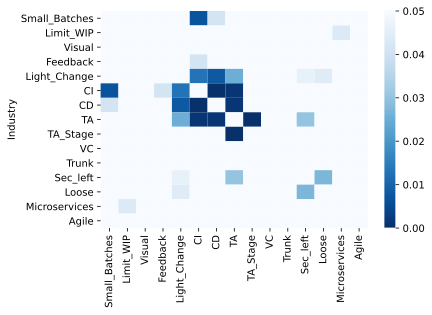

In [23]:

df_temp=df_chi_practices_ind.replace("-",1).replace({"\*":''},regex=True).astype(float)
ax = sns.heatmap(df_temp,vmin=0.00,vmax=0.05, cmap="Blues_r" )


In [24]:

df_chi_practices_aca = pd.DataFrame(columns=v_practices,index=v_practices)
for p1 in v_practices:
    for p2 in v_practices:
        if (p1!=p2):
            crosstab=pd.crosstab(df_aca[p1],df_aca[p2])
            MIN=0
            cells=np.where(crosstab<MIN)
            if len(cells[0])==0:
                _,pval,_,_ = stats.chi2_contingency(crosstab)
                mark="*" if pval<0.05 else ""
                df_chi_practices_aca.at[p1,p2]='{0:0.3f}'.format(pval)+mark
            else: df_chi_practices_aca.at[p1,p2]='cell<5'
        else: df_chi_practices_aca.at[p1,p2]='-'
df_chi_practices_aca.index.name='Academia'
display(df_chi_practices_aca)

,Small_Batches,Limit_WIP,Visual,Feedback,Light_Change,CI,CD,TA,TA_Stage,VC,Trunk,Sec_left,Loose,Microservices,Agile
Academia,,,,,,,,,,,,,,,
Small_Batches,-,0.489,0.002*,0.270,0.005*,0.008*,0.096,0.021*,0.027*,1.000,0.360,0.033*,0.018*,0.340,0.093
Limit_WIP,0.489,-,0.009*,0.302,0.276,0.020*,0.199,0.474,0.276,1.000,0.021*,0.123,0.996,0.032*,0.001*
Visual,0.002*,0.009*,-,0.877,0.004*,0.007*,0.196,0.046*,0.354,1.000,0.244,0.094,0.962,0.340,0.016*
Feedback,0.270,0.302,0.877,-,0.741,0.269,0.216,0.519,0.741,1.000,0.495,0.040*,0.406,0.965,0.082
Light_Change,0.005*,0.276,0.004*,0.741,-,0.055,0.027*,0.027*,0.009*,1.000,0.062,0.056,0.354,0.728,0.217
CI,0.008*,0.020*,0.007*,0.269,0.055,-,0.000*,0.000*,0.001*,1.000,0.114,0.121,0.827,0.001*,0.000*
CD,0.096,0.199,0.196,0.216,0.027*,0.000*,-,0.000*,0.000*,1.000,0.806,0.018*,0.556,0.004*,0.030*
TA,0.021*,0.474,0.046*,0.519,0.027*,0.000*,0.000*,-,0.000*,1.000,0.051,0.317,0.196,0.029*,0.030*
TA_Stage,0.027*,0.276,0.354,0.741,0.009*,0.001*,0.000*,0.000*,-,1.000,0.062,0.056,0.354,0.252,0.615


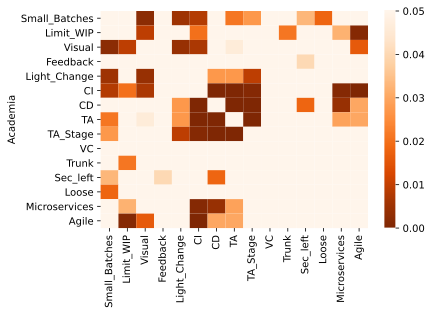

In [25]:

df_temp=df_chi_practices_aca.replace("-",1).replace({"\*":''},regex=True).astype(float)
ax = sns.heatmap(df_temp,vmin=0.00,vmax=0.05, cmap="Oranges_r" )